In [1]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from package import euklid as eu


In [2]:
path ="../gold.csv"

In [3]:
yahoo_df = pd.read_csv('gold.csv')

In [4]:
# Add indicators
yahoo_df['vwap'] = eu.vwap(yahoo_df['Close'], yahoo_df['Volume'])
yahoo_df['SO'] = eu.Stochastic_Oscillator(yahoo_df['Close'])
yahoo_df['RSI'] = eu.rsi(yahoo_df['Close'],14)
eu.macd(yahoo_df,yahoo_df['Close'])

# Select valid data
yahoo_df = yahoo_df[35:]

C:\Users\valer\OneDrive\Desktop\GitHub Projects\euklid_project\package\euklid.py:18: RuntimeWarning: invalid value encountered in double_scalars
  ind = np.sum(pvol)/np.sum(volume[low_range:(i+1)])


# Normalize

In [5]:
days_ahead = 1
differenced = yahoo_df['Close'] - yahoo_df['Close'].shift(days_ahead)[days_ahead:]
previous_differenced = differenced.shift(1)
yahoo_df["Previous_differenced"] = previous_differenced
yahoo_df["Differenced"] = differenced
yahoo_df = yahoo_df[days_ahead+1:]
yahoo_df.head()

<ipython-input-5-9af33910b41d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yahoo_df["Previous_differenced"] = previous_differenced
<ipython-input-5-9af33910b41d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yahoo_df["Differenced"] = differenced


,Date,Adj Close,Close,High,Low,Open,Volume,SO,RSI,vwap,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,Previous_differenced,Differenced
39,2000-10-25,266.200012,266.200012,267.100006,266.000000,266.200012,20.0,0.000000,47.708551,270.278518,-1.128457,-0.320039,-0.808418,0.000000,-5.000000
40,2000-10-26,264.899994,264.899994,267.000000,264.899994,266.000000,0.0,0.000000,45.332279,270.261745,-1.478985,-0.536454,-0.942532,-5.000000,-5.200012
41,2000-10-27,264.399994,264.399994,265.500000,264.399994,265.500000,1.0,0.000000,44.420546,270.227199,-1.776647,-0.667292,-1.109355,-5.200012,-5.700012
42,2000-10-30,264.299988,264.299988,264.299988,264.299988,264.299988,2.0,0.000000,44.229914,270.125898,-1.997588,-0.710587,-1.287001,-5.700012,-1.900024
43,2000-10-31,264.899994,264.899994,265.000000,264.500000,264.500000,0.0,4.958726,45.727139,269.827280,-2.100063,-0.650449,-1.449614,-1.900024,0.000000


In [6]:
# Try to make predictions on up or down
# def up_down(price):
#     up_down = [np.nan]
#     for i in range(1,len(price)):
#         if price[i] > price[i-1]:
#             up_down.append(1)
#         else:
#             up_down.append(0)
#     return up_down
# yahoo_df['up_down'] = up_down(list(yahoo_df['Close']))
# yahoo_df

In [7]:
# price = yahoo_df['Differenced'] 
# price.plot()

In [8]:
yahoo_df = yahoo_df.iloc[days_ahead:,:]
yahoo_df = yahoo_df.drop(columns = ['Volume', 'vwap'])
close = yahoo_df['Close']
yahoo_df = yahoo_df.iloc[:,6:]
yahoo_df.head()

,SO,RSI,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,Previous_differenced,Differenced
42,0.000000,44.229914,-1.997588,-0.710587,-1.287001,-5.700012,-1.900024
43,4.958726,45.727139,-2.100063,-0.650449,-1.449614,-1.900024,0.000000
44,0.000000,43.635287,-2.236188,-0.629260,-1.606929,0.000000,-0.500000
45,5.882353,44.983574,-2.277470,-0.536433,-1.741037,-0.500000,0.100006
46,9.210680,45.541900,-2.267904,-0.421493,-1.846410,0.100006,-0.299988


In [9]:
yahoo_df = yahoo_df.iloc[:,6:]

In [10]:
# convert series to supervised learning
values = yahoo_df.values
# ensure all data is float
values = values.astype('float32')
# normalize features
values

array([[-1.9000244],
       [ 0.       ],
       [-0.5      ],
       ...,
       [28.599976 ],
       [15.599976 ],
       [14.200073 ]], dtype=float32)

# Train, test, val

In [11]:
# split into train and test sets
n_train_days = int(round(yahoo_df.shape[0]*0.8))

In [12]:
train = values[:n_train_days, :]
test = values[n_train_days:, :]
close_train = list(close)[:n_train_days]
close_test = list(close)[n_train_days:]

In [13]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]


In [14]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(4273, 1, 0) (4273,) (1068, 1, 0) (1068,)


# LSTM

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras import optimizers
import tensorflow as tf

In [16]:
# Set early stopping monitor so the model stops training when it won't improve anymore
esm = EarlyStopping(monitor = 'loss', patience = 7)

# Set the optimizer
adam = tf.optimizers.Adam(learning_rate = 0.0001)

Epoch 1/150
428/428 - 2s - loss: 13.6523 - 2s/epoch - 4ms/step
Epoch 2/150
428/428 - 0s - loss: 13.6498 - 448ms/epoch - 1ms/step
Epoch 3/150
428/428 - 0s - loss: 13.6470 - 474ms/epoch - 1ms/step
Epoch 4/150
428/428 - 0s - loss: 13.6440 - 476ms/epoch - 1ms/step
Epoch 5/150
428/428 - 0s - loss: 13.6413 - 471ms/epoch - 1ms/step
Epoch 6/150
428/428 - 0s - loss: 13.6384 - 437ms/epoch - 1ms/step
Epoch 7/150
428/428 - 0s - loss: 13.6357 - 434ms/epoch - 1ms/step
Epoch 8/150
428/428 - 0s - loss: 13.6332 - 443ms/epoch - 1ms/step
Epoch 9/150
428/428 - 0s - loss: 13.6307 - 428ms/epoch - 1ms/step
Epoch 10/150
428/428 - 0s - loss: 13.6286 - 467ms/epoch - 1ms/step
Epoch 11/150
428/428 - 0s - loss: 13.6267 - 443ms/epoch - 1ms/step
Epoch 12/150
428/428 - 0s - loss: 13.6247 - 431ms/epoch - 1ms/step
Epoch 13/150
428/428 - 0s - loss: 13.6232 - 428ms/epoch - 1000us/step
Epoch 14/150
428/428 - 0s - loss: 13.6218 - 473ms/epoch - 1ms/step
Epoch 15/150
428/428 - 0s - loss: 13.6204 - 428ms/epoch - 1ms/step
Epoc

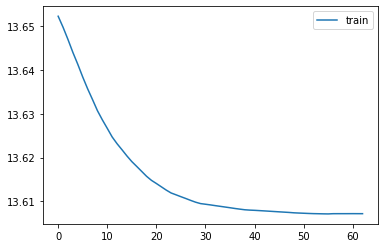

In [17]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer=adam)
# fit network
history = model.fit(train_X, train_y, epochs=150, batch_size=10, verbose=2, shuffle=False,  callbacks = [esm])
# plot history
plt.plot(history.history['loss'], label='train')
#plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Prediction 

In [18]:
predict = model.predict(test_X)
predict = [float(predict[i]) for i in range(len(predict))]
predict[:5]

[1.024428129196167,
 1.024428129196167,
 1.024428129196167,
 1.024428129196167,
 1.024428129196167]

In [19]:
def ud_pred(predict):
    up_down = []
    for i in range(len(predict)):
        if predict[i] > 0:
            up_down.append(1)
        else:
            up_down.append(0)
    return up_down

def ud(predict):
    up_down = [1]
    for i in range(1,len(predict)):
        if predict[i] > predict[i-1]:
            up_down.append(1)
        else:
            up_down.append(0)
    return up_down

In [20]:
# Scale back predictions
def scale_back(pred, close):
    for i in range(1,len(pred)):
        pred[i-1] = pred[i]+list(close)[i-1]
    return pred

In [21]:
pred = scale_back(predict, close_test)
updown_pred = ud_pred(predict)

In [22]:
df = pd.DataFrame(updown_pred)
df["Close"] = close_test
# df["updown_pred"] = df.iloc[:,0]
# df["updown_actual"] = ud(close_test)
df["Scaled_pred"] = pred
df["Pred"] = predict
df = df.iloc[:,1:] 
# print('Model Accuracy: ', (df["updown_pred"] == df["updown_actual"]).sum()/df.shape[0])
# print('Baseline Accuracy: 0.5')
df.head()

,Close,Scaled_pred,Pred
0,1276.500000,1277.524428,1277.524428
1,1277.400024,1278.424453,1278.424453
2,1295.800049,1296.824477,1296.824477
3,1274.599976,1275.624404,1275.624404
4,1281.099976,1282.124404,1282.124404


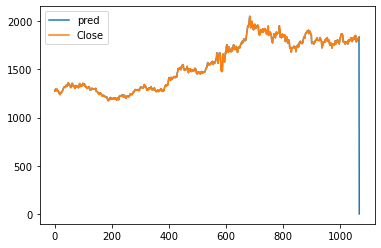

In [23]:
plt.plot(df['Pred'], label='pred')
plt.plot(df["Close"], label='Close')
plt.legend()
plt.show()

In [24]:
commission = 0.005
def long_equity(prediction, close):
    long = [close[0]]
    for i in range(1,len(prediction)-1):
        if prediction[i] > close[i-1]:
            long.append(close[i] - close[i-1] - close[i-1]*commission)
        else:
            long.append(0)
    return long

def short_equity(prediction, close):
    short = [close[0]]
    for i in range(1,len(prediction)-1):
        if prediction[i] < close[i-1]:
            short.append(close[i-1] - close[i] - close[i-1]*commission)
        else:
            short.append(0)
    return short  

def total_equity(prediction, close):
    total = [close[0]]
    for i in range(1,len(prediction)-1):
        if prediction[i] > close[i-1]:
            total.append(close[i] - close[i-1] - close[i-1]*commission)
        else:
            total.append(close[i-1] - close[i] - close[i-1]*commission)
    return total

# def percentage_returns(equity):
#     equity = 0
#     for i in range(1,len(equity))

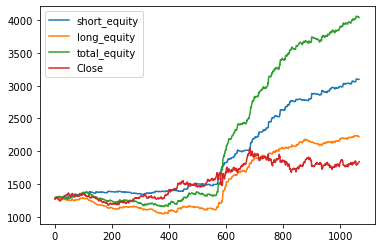

In [28]:
df_equity = pd.DataFrame()
df_equity["long_equity"] = long_equity(df["Pred"], df["Close"])
df_equity["short_equity"] = short_equity(df["Pred"], df["Close"])
df_equity["total_equity"] = total_equity(df["Pred"], df["Close"])
df_equity["short_equity"].cumsum().plot()
df_equity["long_equity"].cumsum().plot()
df_equity["total_equity"].cumsum().plot()
df["Close"].plot()
# df["Pred"].shift(-1).plot()
plt.legend()